In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pickle
import cv2
# from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Define the paths to your training and validation directories
train_data_dir = '/kaggle/input/cotton-disease/Cotton_Disease/Training'
validation_data_dir = '/kaggle/input/cotton-disease/Cotton_Disease/Validation'

In [ ]:
# Set the image dimensions and other parameters
image_width = 256
image_height = 256
batch_size = 16
num_classes = 8

In [ ]:
class_counts = {}
import os
# Iterate through the subdirectories (classes) in the training data directory
for class_name in os.listdir(train_data_dir):
    class_dir = os.path.join(train_data_dir, class_name)
    if os.path.isdir(class_dir):
        # Count the number of files in the class directory
        file_count = len(os.listdir(class_dir))
        class_counts[class_name] = file_count

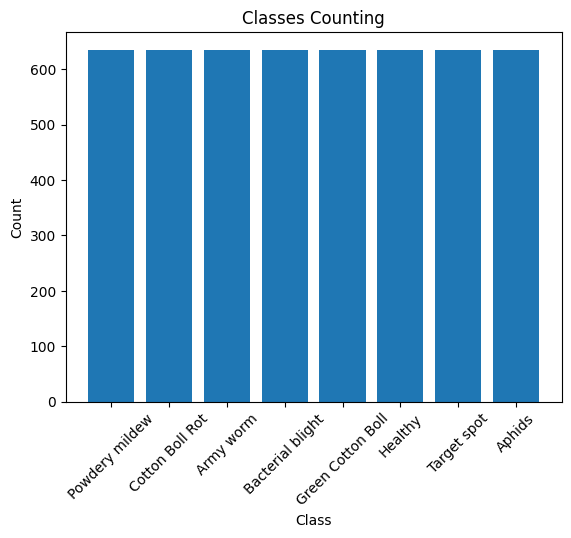

In [ ]:
import matplotlib.pyplot as plt

# Extract the class names and counts
class_names = list(class_counts.keys())
counts = list(class_counts.values())

# Create a bar plot
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Classes Counting')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True
)

# Rescaling for validation data (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Train generator 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Validation generator
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 5080 images belonging to 8 classes.
Found 1280 images belonging to 8 classes.


In [ ]:
def proposed_model():
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), input_shape=(image_width, image_height, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Flatten the feature maps
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model


In [6]:
# from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001  # Set your desired learning rate

model = proposed_model()
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())



In [ ]:
res_hisotory=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/100
317/317 [==============================] - 138s 381ms/step - loss: 2.0583 - accuracy: 0.3260 - val_loss: 2.7598 - val_accuracy: 0.2016
Epoch 2/100
317/317 [==============================] - 89s 281ms/step - loss: 1.7210 - accuracy: 0.4277 - val_loss: 1.4555 - val_accuracy: 0.4781
Epoch 3/100
317/317 [==============================] - 88s 278ms/step - loss: 1.5905 - accuracy: 0.4674 - val_loss: 1.2785 - val_accuracy: 0.5789
Epoch 4/100
317/317 [==============================] - 88s 276ms/step - loss: 1.5254 - accuracy: 0.4860 - val_loss: 1.1533 - val_accuracy: 0.6227
Epoch 5/100
317/317 [==============================] - 88s 279ms/step - loss: 1.3995 - accuracy: 0.5310 - val_loss: 0.9914 - val_accuracy: 0.6766
Epoch 6/100
317/317 [==============================] - 89s 280ms/step - loss: 1.3719 - accuracy: 0.5411 - val_loss: 0.9938 - val_accuracy: 0.6555
Epoch 7/100
317/317 [==============================] - 88s 276ms/step - loss: 1.3108 - accuracy: 0.5478 - val_loss: 0.8965 

In [ ]:
model.save("/kaggle/working/model")

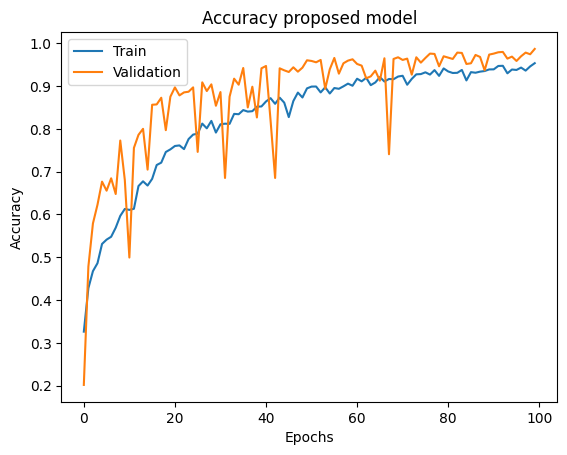

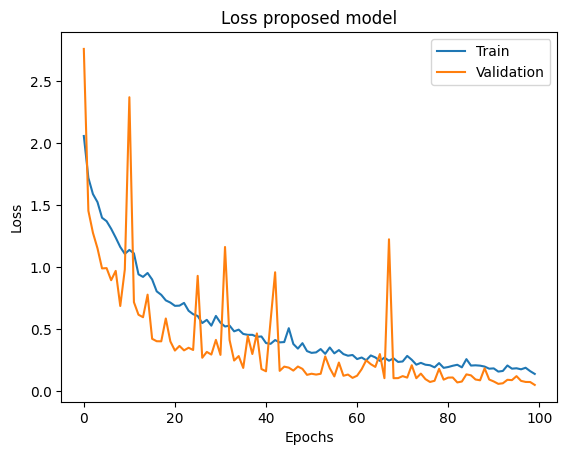

In [ ]:
import matplotlib.pyplot as plt

# Get the accuracy and loss values from the training history
train_accuracy = res_hisotory.history['accuracy']
train_loss = res_hisotory.history['loss']
val_accuracy = res_hisotory.history['val_accuracy']
val_loss = res_hisotory.history['val_loss']

# Plotting the accuracy graph
plt.plot(range(len(train_accuracy)), train_accuracy, label='Train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='Validation')
plt.title('Accuracy proposed model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the loss graph
plt.plot(range(len(train_loss)), train_loss, label='Train')
plt.plot(range(len(val_loss)), val_loss, label='Validation')
plt.title('Loss proposed model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 36ms/step
Classification Report:

                   precision    recall  f1-score   support

           Aphids       0.99      0.95      0.97       160
        Army worm       0.98      1.00      0.99       160
 Bacterial blight       0.98      1.00      0.99       160
  Cotton Boll Rot       1.00      0.99      0.99       160
Green Cotton Boll       0.98      0.99      0.99       160
          Healthy       0.99      1.00      1.00       160
   Powdery mildew       0.99      0.99      0.99       160
      Target spot       0.97      0.97      0.97       160

         accuracy                           0.99      1280
        macro avg       0.99      0.99      0.99      1280
     weighted avg       0.99      0.99      0.99      1280

Confusion Matrix:

[[152   2   0   0   2   1   0   3]
 [  0 160   0   0   0   0   0   0]
 [  0   0 160   0   0   0   0   0]
 [  0   0   0 158   1   0   1   0]
 [  0   0   0   0 159   0   0   1]
 [  0   0   0   0  

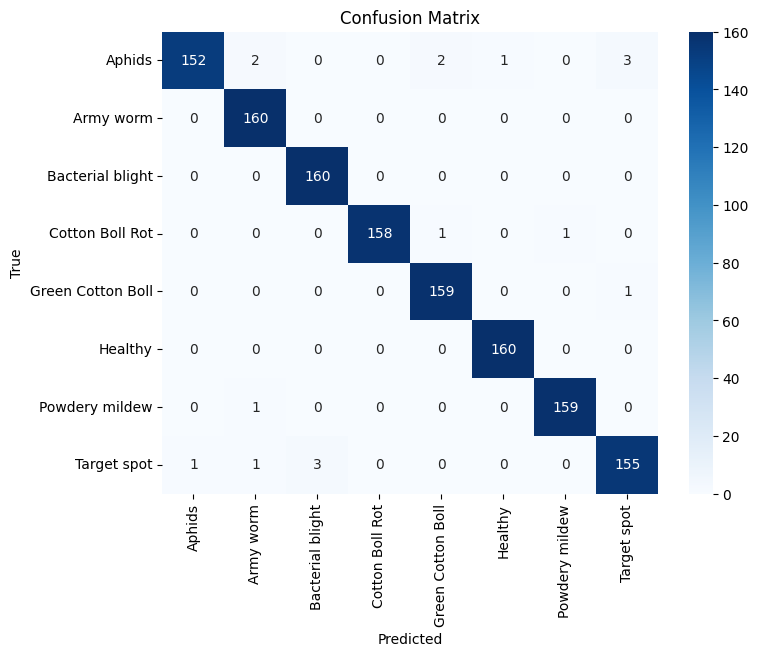

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
from keras.models import load_model
model = load_model('/kaggle/working/model')

# Use the validation generator to generate predictions
validation_generator.reset()
num_batches = len(validation_generator)
y_true = []
y_pred = []

for i in range(num_batches):
    batch_data, batch_labels = validation_generator.next()
    batch_pred = model.predict(batch_data)

    # Append true labels and predicted labels for this batch
    y_true.extend(np.argmax(batch_labels, axis=1))
    y_pred.extend(np.argmax(batch_pred, axis=1))

# Calculate and print the classification report
print("Classification Report:\n")
target_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# Calculate and plot the confusion matrix as a heatmap
print("Confusion Matrix:\n")
confusion_mat = confusion_matrix(y_true, y_pred)
print(confusion_mat)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

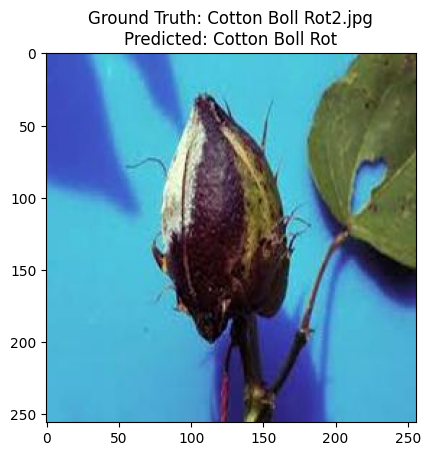

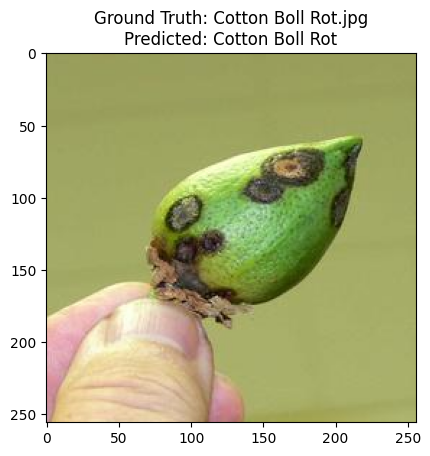

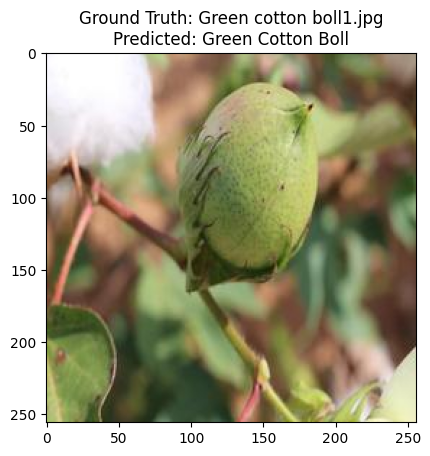

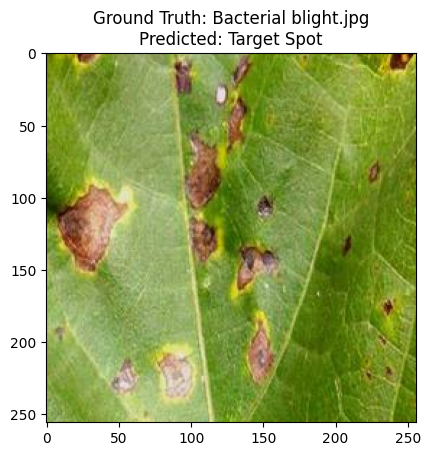

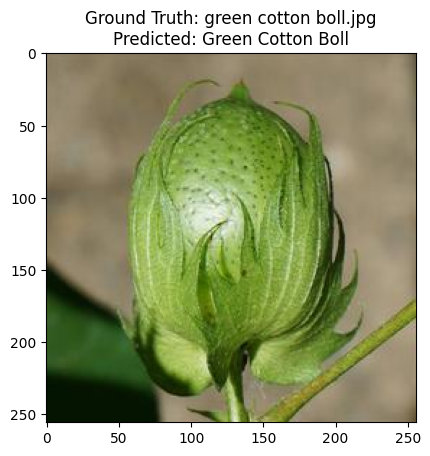

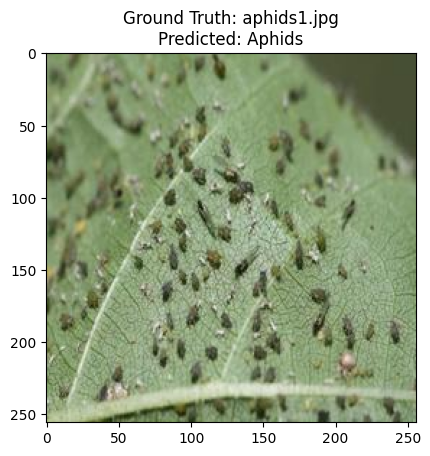

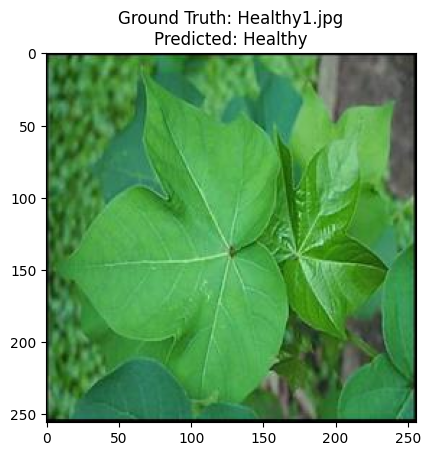

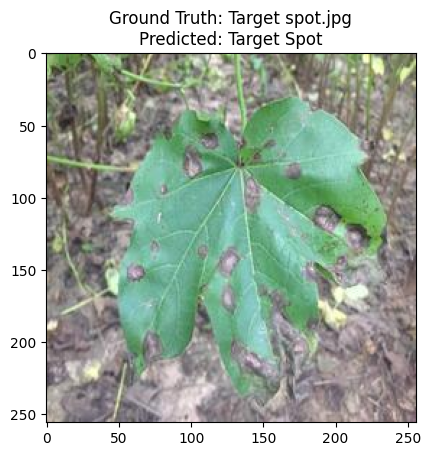

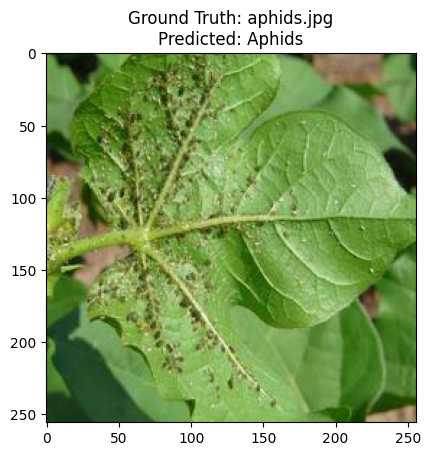

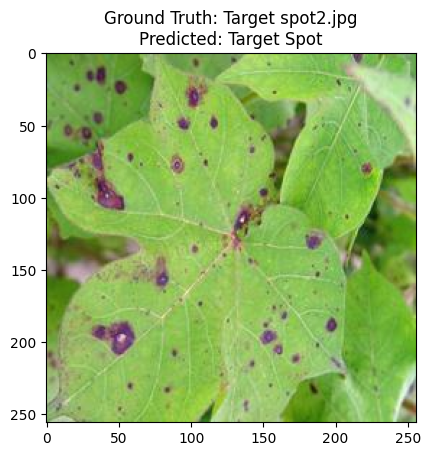

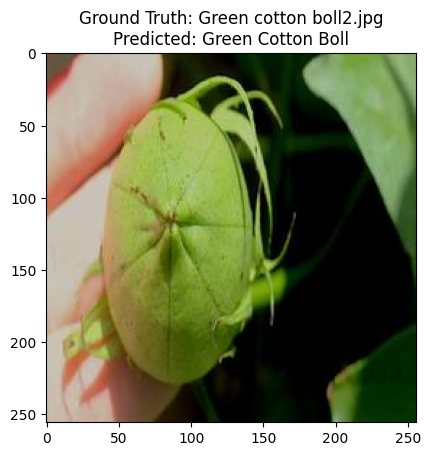

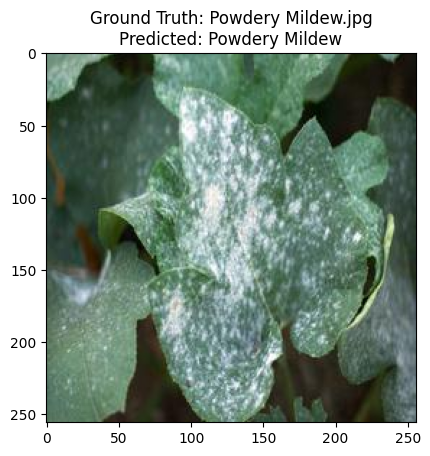

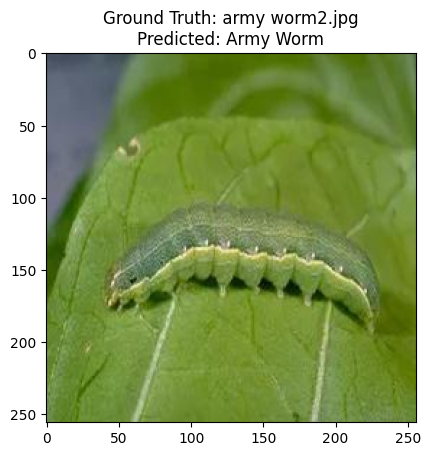

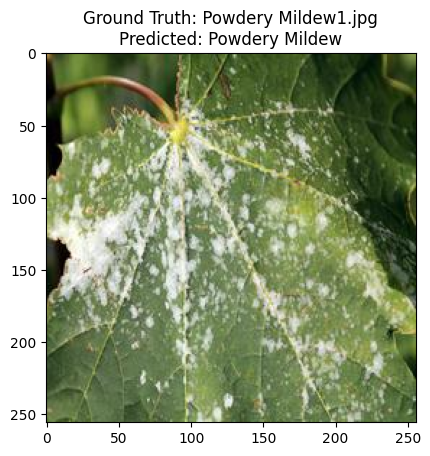

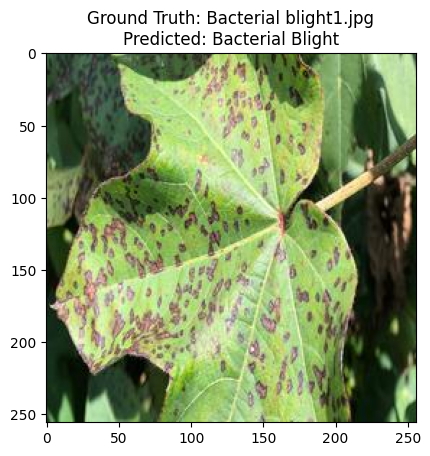

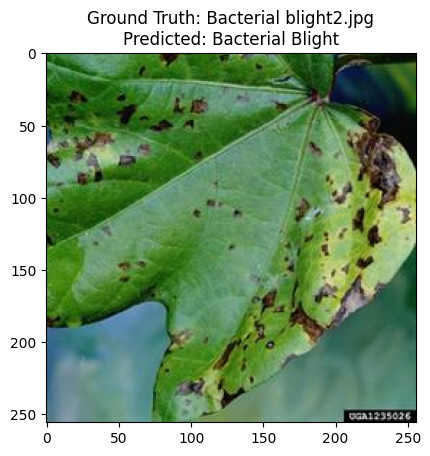

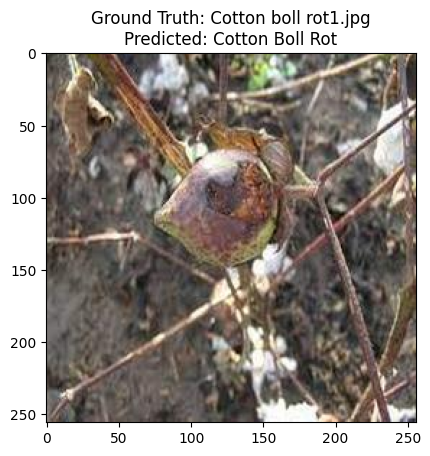

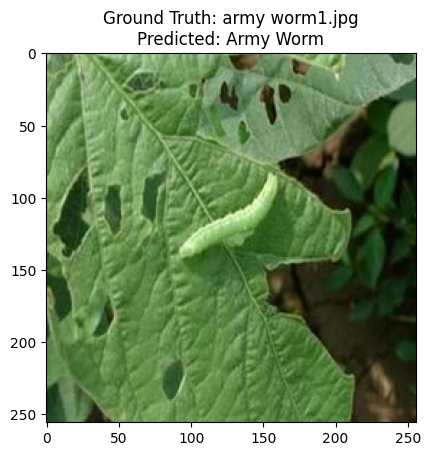

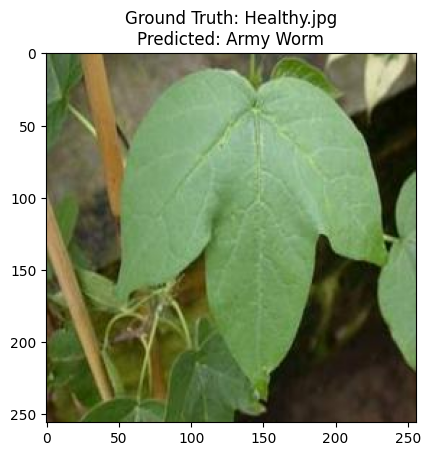

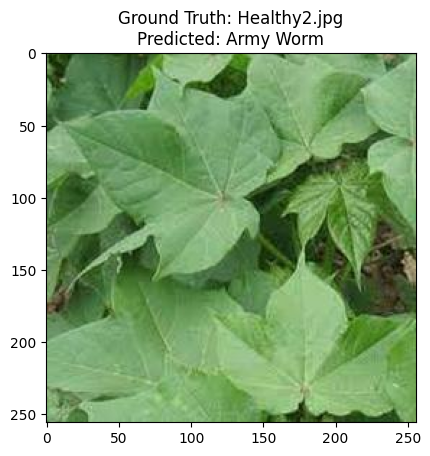

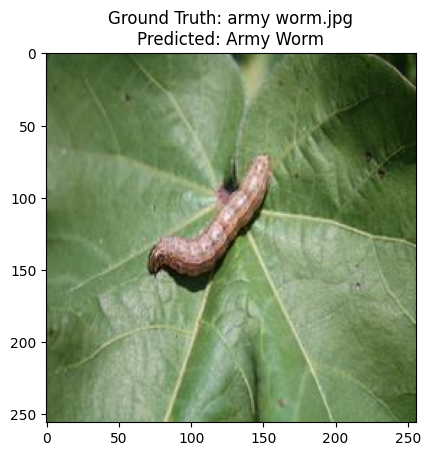

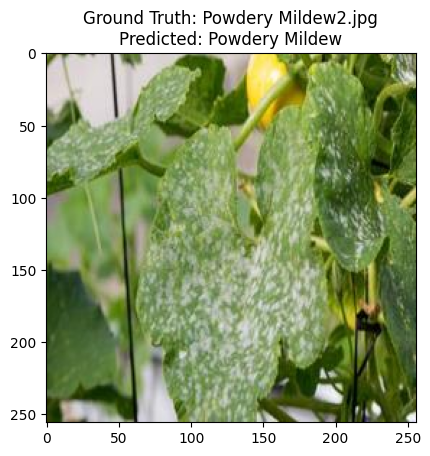

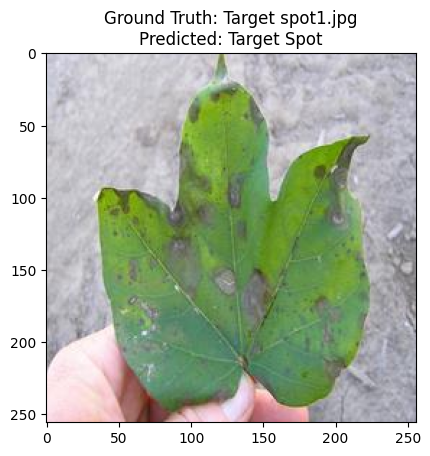

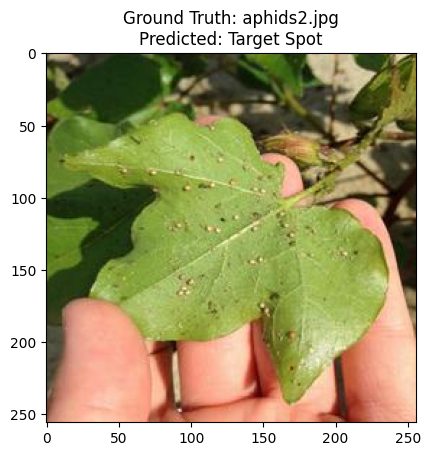

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Define the path to your test images directory
test_dir = '/kaggle/input/test-2/Test2'

# Define a mapping between class indices and class names
class_names = {
    0: 'Aphids',
    1: 'Army Worm',
    2: 'Bacterial Blight',
    3: 'Cotton Boll Rot',
    4: 'Green Cotton Boll',
    5: 'Healthy',
    6: 'Powdery Mildew',
    7: 'Target Spot'
    # Add more class names as needed
}

# Load the TensorFlow SavedModel
model = tf.saved_model.load("/kaggle/working/model")  # Replace with the path to your SavedModel directory

# Function to make predictions on a single image
def predict_single_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target_size if needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image data if the model expects it

    # Make predictions using the loaded model
    predictions = model(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)

    # Get the predicted class name based on the predicted class index
    predicted_class_name = class_names.get(predicted_class_index[0], 'Unknown Class')

    return predicted_class_name

# Iterate through the images in the test directory and display them with ground truth and predicted labels
for filename in os.listdir(test_dir):
    if filename.endswith(".jpg"):  # Assuming your images have .jpg extension
        img_path = os.path.join(test_dir, filename)
        predicted_class = predict_single_image(img_path)

        # Extract the ground truth label from the filename
        # Assuming the format is "class_label (number).jpg"
        parts = filename.split('(')
        ground_truth_label = parts[0].strip()

        # Load and display the image
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(f'Ground Truth: {ground_truth_label}\nPredicted: {predicted_class}')
        plt.show()

